In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import networkx as nx
import numpy as np
import plotly.graph_objects as go

# Bar Graph

<Figure size 1000x600 with 0 Axes>

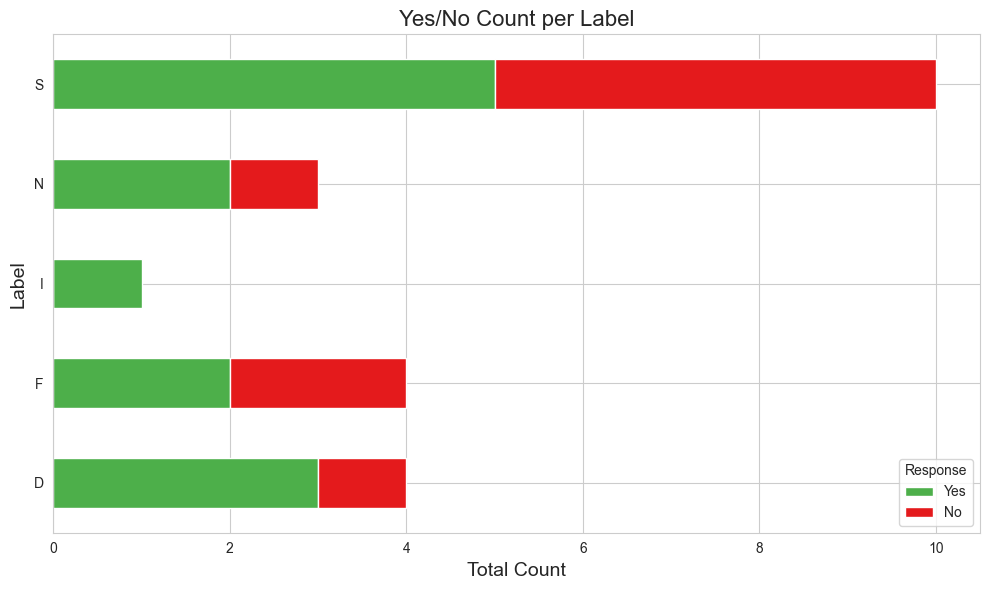

In [10]:
# Input the complete data directly
data = pd.DataFrame({
    'LABEL': ['D', 'D', 'D', 'D', 'F', 'F', 'F', 'F', 'I', 'N', 'N', 'N', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S'],
    'COUNT': [1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0]
})

# Transform 1 into "Yes" and 0 into "No"
data['COUNT'] = data['COUNT'].map({1: 'Yes', 0: 'No'})

# Count the occurrences of "Yes" and "No" for each LABEL
aggregated_data = data.groupby(['LABEL', 'COUNT']).size().unstack(fill_value=0)

# Set the style for the plot
sns.set_style("whitegrid")

# Create the horizontal stacked bar plot
plt.figure(figsize=(10, 6))
aggregated_data[['Yes', 'No']].plot(kind='barh', stacked=True, color=['#4daf4a', '#e41a1c'], figsize=(10, 6))

# Add titles and labels
plt.title('Yes/No Count per Label', fontsize=16)
plt.xlabel('Total Count', fontsize=14)
plt.ylabel('Label', fontsize=14)

# Show the plot
plt.legend(title='Response')
plt.tight_layout()
plt.show()


# Snakey Diagram

In [11]:
data = {
    'LABEL': ['S', 'F', 'D', 'N', 'I'],
    'PS': [3, 0, 1, 1, 0],
    'OMP': [4, 1, 1, 1, 1],
    'CNP': [1, 2, 2, 1, 0],
    'NRP': [1, 1, 0, 1, 0],
    'NMCCC': [0, 1, 0, 0, 0],
    'PEC': [0, 0, 0, 1, 0],
    'NCDM': [1, 0, 1, 1, 0],
    'RGS': [1, 1, 1, 0, 0],
    'Reg': [2, 2, 1, 2, 0],
    'Aca': [7, 2, 3, 2, 1],
    'Oth': [1, 0, 1, 1, 0]
}

# Create DataFrame
sankey_df = pd.DataFrame(data)

# Define the start, middle, and end nodes
start = list(sankey_df.columns[1:9])     # ['PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS']
middle = list(sankey_df['LABEL'].unique())  # ['S', 'F', 'D', 'N', 'I']
end = list(sankey_df.columns[9:])        # ['Reg', 'Aca', 'Oth']

# All node labels combined
node_labels = start + middle + end

# Create mapping of node names to indices
node_indices = {x: i for i, x in enumerate(node_labels)}

# Define function to find distance/values in the DataFrame
def find_distance_sankey(label, column):
    """Returns the value for the given label and column."""
    return sankey_df.loc[sankey_df['LABEL'] == label, column].values[0]

# Initialize lists for sources, targets, and values
source = []
target = []
value = []

# Get values from start to middle
for s in start:
    for m in middle:
        dist = find_distance_sankey(m, s)
        if dist > 0:
            source.append(node_indices[s])
            target.append(node_indices[m])
            value.append(dist)

# Get values from middle to end
for m in middle:
    for e in end:
        dist = find_distance_sankey(m, e)
        if dist > 0:
            source.append(node_indices[m])
            target.append(node_indices[e])
            value.append(dist)

# Define colors for the nodes
colors = [
    '#FFA07A', # PS
    '#20B2AA', # OMP
    '#FF8C00', # CNP
    '#FF6AB4', # NRP
    '#8FBC8F', # NMCCC
    '#02CED1', # PEC
    '#FFD701', # NCDM
    '#BA55D3', # RGS
    '#87CEFA', # S
    '#4782B4', # F
    '#5F9EA0', # D
    '#6395EC', # N 
    '#00BFFF', # I
    '#3CB371', # Reg
    '#97FB98', # Aca
    '#90EE8F'  # Oth
]

# Create the Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_labels,
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[colors[s] for s in source]  # Color the links based on the source
    )
)])

fig.update_layout(
    title_text="Flow from Start to Middle to End (Sankey Diagram)",
    font_size=12,
    width=600,    # Reduce width here
    height=400    # Adjust height proportionally
    )
fig.show()


# Network Graph

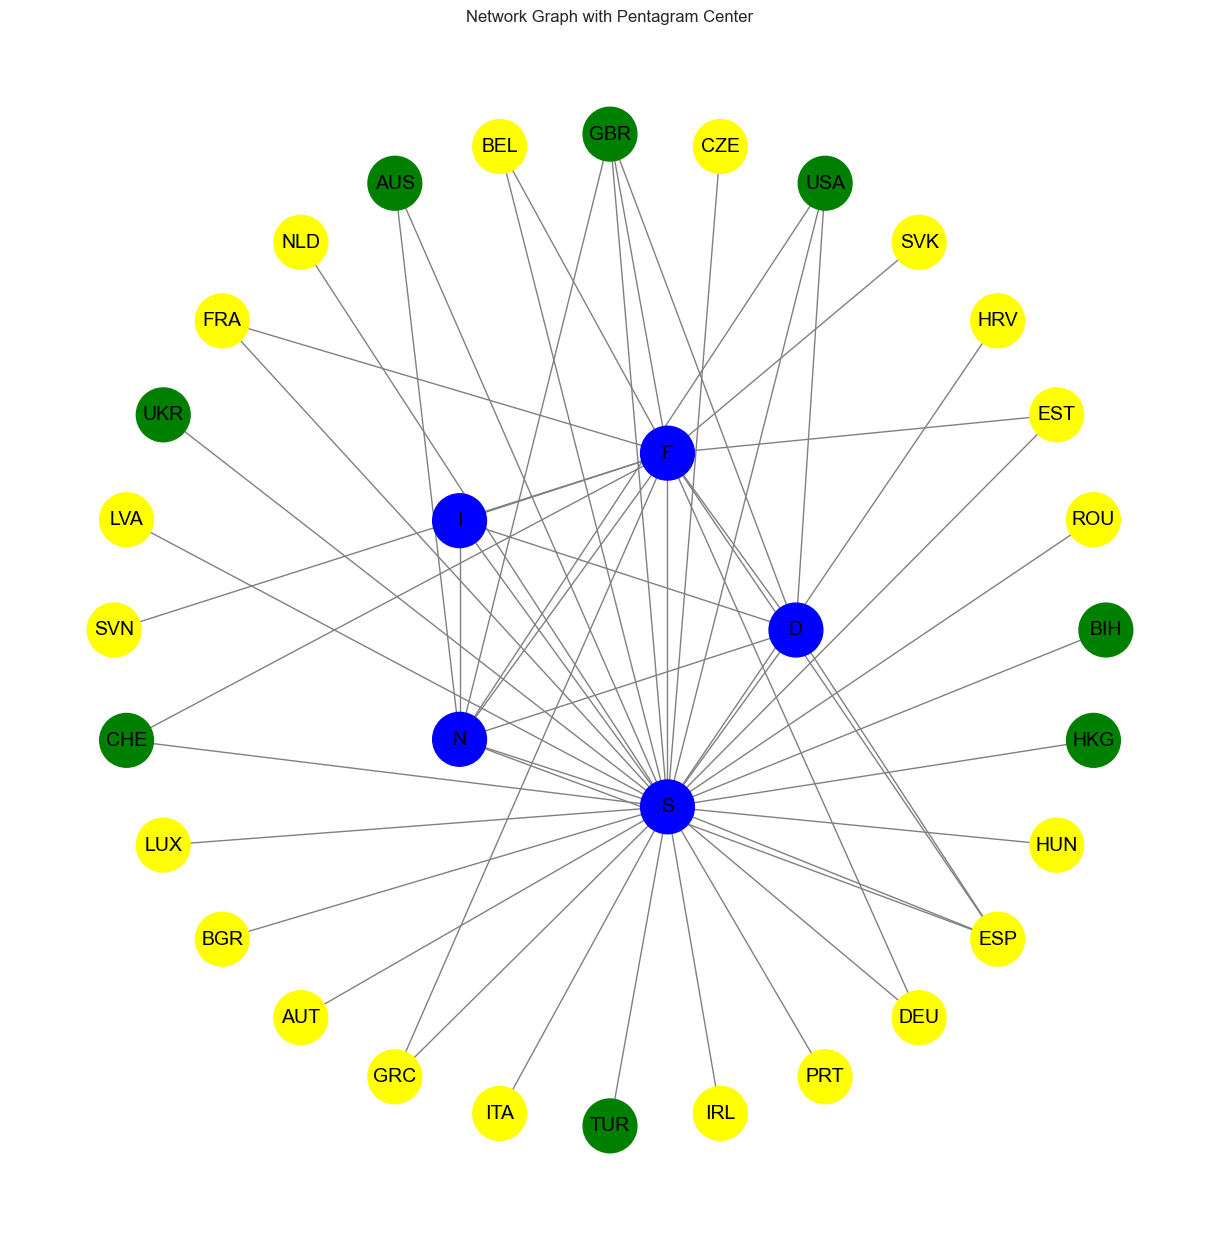

In [15]:
data_dict = {
    'LABELS': ['D', 'F', 'I', 'N', 'S'],
    'N': [3, 1, 0, 0, 5],
    'D': [0, 2, 0, 2, 4],
    'F': [3, 0, 0, 2, 3],
    'I': [1, 1, 0, 1, 3],
    'S': [3, 1, 0, 2, 0],
    'AUT': [0, 0, 0, 0, 2],
    'BEL': [0, 1, 0, 0, 2],
    'BIH': [0, 0, 0, 0, 2],
    'BGR': [0, 0, 0, 0, 2],
    'HRV': [0, 0, 0, 0, 2],
    'CZE': [0, 0, 0, 0, 2],
    'EST': [0, 1, 0, 0, 2],
    'FRA': [0, 1, 0, 0, 2],
    'DEU': [0, 1, 0, 0, 2],
    'GRC': [0, 1, 0, 0, 2],
    'HUN': [0, 0, 0, 0, 2],
    'IRL': [0, 0, 0, 0, 2],
    'ITA': [0, 0, 0, 0, 2],
    'LVA': [0, 0, 0, 0, 2],
    'LUX': [0, 0, 0, 0, 2],
    'NLD': [0, 0, 0, 0, 2],
    'PRT': [0, 0, 0, 0, 2],
    'ROU': [0, 0, 0, 0, 2],
    'SVK': [0, 1, 0, 0, 0],
    'SVN': [0, 1, 0, 0, 0],
    'ESP': [1, 2, 0, 1, 2],
    'CHE': [0, 1, 0, 0, 2],
    'TUR': [0, 0, 0, 0, 2],
    'UKR': [0, 0, 0, 0, 2],
    'GBR': [2, 2, 0, 2, 3],
    'AUS': [0, 0, 0, 1, 1],
    'HKG': [0, 0, 0, 0, 1],
    'USA': [1, 0, 0, 1, 1]
}

# Convert the dictionary to a DataFrame
data = pd.DataFrame(data_dict)

# Define node groups
pentagram_nodes = ['D', 'F', 'I', 'N', 'S']
blue_nodes = pentagram_nodes
green_nodes = ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA']
yellow_nodes = ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']

# Create the graph
G = nx.Graph()

# Add nodes
for node in data['LABELS']:
    G.add_node(node)

# Add edges based on non-zero values in the data
for i, row in data.iterrows():
    source = row['LABELS']
    for target in data.columns[1:]:  # Skip 'LABELS' column
        if row[target] > 0:
            G.add_edge(source, target)

# Position the pentagram nodes in a pentagon shape at the center
pentagram_pos = {}
angle_step = 2 * np.pi / 5
radius = 1.5  # Radius for pentagon
for i, node in enumerate(pentagram_nodes):
    angle = i * angle_step
    pentagram_pos[node] = (radius * np.cos(angle), radius * np.sin(angle))

# Position the other nodes in a circle around the pentagram
outer_nodes = list(set(G.nodes) - set(pentagram_nodes))
outer_pos = {}
angle_step_outer = 2 * np.pi / len(outer_nodes)
radius_outer = 4  # Radius for outer circle
for i, node in enumerate(outer_nodes):
    angle = i * angle_step_outer
    outer_pos[node] = (radius_outer * np.cos(angle), radius_outer * np.sin(angle))

# Combine positions
pos = {**pentagram_pos, **outer_pos}

# Define node colors
node_colors = []
for node in G.nodes:
    if node in blue_nodes:
        node_colors.append('blue')
    elif node in green_nodes:
        node_colors.append('green')
    elif node in yellow_nodes:
        node_colors.append('yellow')
    else:
        node_colors.append('gray')  # Default color for undefined nodes

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=node_colors,
    node_size=1500,     
    font_size=14,       
    edge_color='gray'
)
plt.title('Network Graph with Pentagram Center')
plt.show()
